<a href="https://colab.research.google.com/github/BlackAngel2108/Tensor_plot/blob/main/Tensor_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

In [3]:
tensor_4d = torch.rand(20, 20, 20, 20)

In [4]:
tensor_4d

tensor([[[[5.9029e-01, 1.1827e-01, 4.4706e-01,  ..., 8.7828e-01,
           6.4588e-01, 3.3373e-01],
          [8.7575e-01, 5.0007e-02, 4.5633e-01,  ..., 5.9529e-01,
           3.0928e-01, 1.2633e-01],
          [8.8839e-01, 7.4987e-01, 6.4086e-01,  ..., 6.8707e-01,
           8.7739e-01, 9.2148e-02],
          ...,
          [7.5661e-01, 8.6646e-01, 2.6991e-01,  ..., 6.1426e-01,
           1.2120e-01, 7.4643e-01],
          [5.3765e-02, 5.6429e-01, 8.6876e-01,  ..., 2.9676e-01,
           6.4647e-01, 8.3737e-01],
          [4.7700e-01, 6.7413e-01, 4.4381e-01,  ..., 9.6115e-01,
           2.2785e-01, 3.0528e-01]],

         [[9.9907e-01, 9.4678e-01, 7.1490e-01,  ..., 4.3458e-02,
           5.6254e-01, 8.9898e-01],
          [5.7341e-02, 6.0373e-01, 2.9990e-01,  ..., 8.1608e-01,
           4.8349e-01, 7.8785e-01],
          [1.5551e-01, 5.3678e-01, 6.1793e-02,  ..., 4.3583e-01,
           1.1339e-01, 7.0508e-01],
          ...,
          [6.1734e-01, 3.2208e-01, 3.9808e-01,  ..., 3.4705

In [55]:
def visualize_2d_slice(tensor, axis1, axis2, fixed_indices):
    lst=[0,1,2,3]
    lst.remove(axis1)
    lst.remove(axis2)
    slice_2d = tensor.select(lst[0], fixed_indices[0])
    remaining_axis = lst[1] - 1 if lst[1] > lst[0] else lst[1]
    slice_2d = slice_2d.select(remaining_axis, fixed_indices[1])
    slice_2d = slice_2d.T

    plt.imshow(slice_2d.numpy(), cmap="viridis")
    plt.colorbar(label="value ")
    plt.xlabel(f"axis {axis1}")
    plt.ylabel(f"axis {axis2}")
    plt.title(f"2D: axis {axis1} and {axis2}")
    plt.show()

In [56]:
def visualize_3d_slice(tensor, axis1, axis2, axis3, fixed_index):
    fixed_axis=0+1+2+3-axis1-axis2-axis3
    slice_3d = tensor.select(fixed_axis, fixed_index)

    x, y, z = torch.meshgrid(
        torch.arange(slice_3d.size(0)),
        torch.arange(slice_3d.size(1)),
        torch.arange(slice_3d.size(2)),
        indexing="ij"
    )

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(x.numpy(), y.numpy(), z.numpy(), c=slice_3d.numpy().flatten(), cmap="viridis")
    plt.colorbar(scatter, label="value ")
    ax.set_xlabel(f"axis {axis1}")
    ax.set_ylabel(f"axis {axis2}")
    ax.set_zlabel(f"axis {axis3}")
    ax.set_title(f"3D: axis {axis1}, {axis2}, {axis3}")
    plt.show()

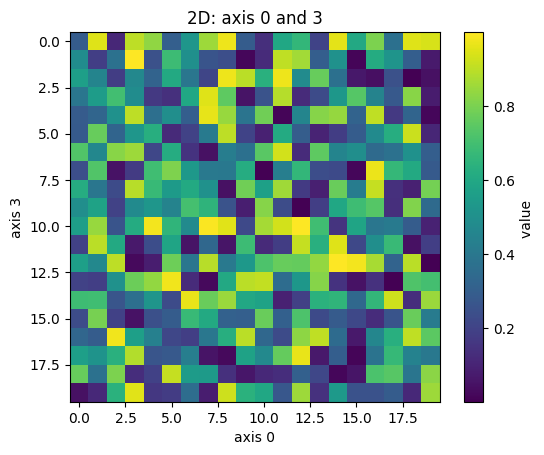

In [57]:
visualize_2d_slice(tensor_4d, axis1=0, axis2=3, fixed_indices=(10, 10))

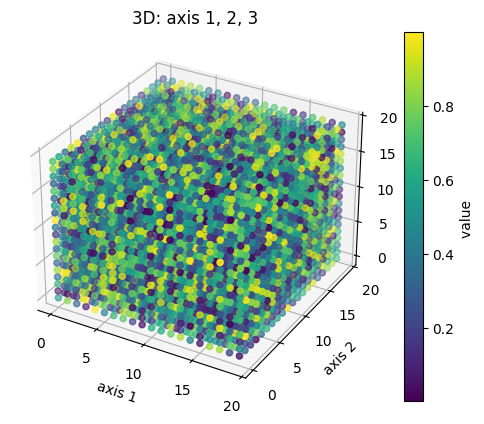

In [58]:
visualize_3d_slice(tensor_4d, axis1=1, axis2=2, axis3=3, fixed_index=10)

In [59]:
size=20
x = torch.linspace(0, 2 * torch.pi, size)
y = torch.linspace(0, 2 * torch.pi, size)
z = torch.linspace(0, 2 * torch.pi, size)
t = torch.linspace(0, 2 * torch.pi, size)

X, Y, Z, T = torch.meshgrid(x, y, z, t, indexing="ij")

tensor_sin = torch.sin(X) + torch.sin(Y) + torch.sin(Z) + torch.sin(T)

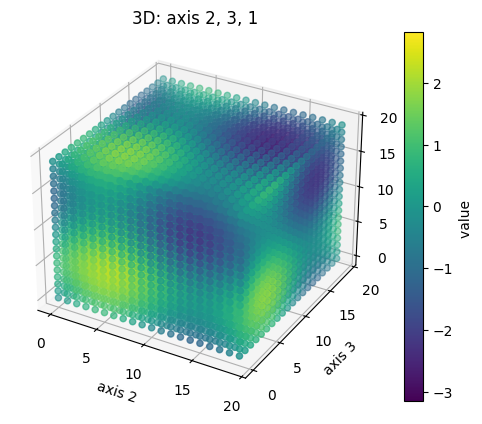

In [60]:
visualize_3d_slice(tensor_sin, axis1=2, axis2=3, axis3=1, fixed_index=10)

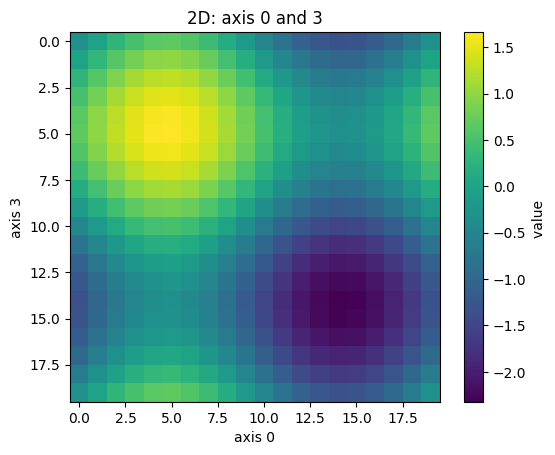

In [61]:
visualize_2d_slice(tensor_sin, axis1=0, axis2=3, fixed_indices=(10,10))

In [62]:
size = 50
tensor_lin = torch.arange(size, dtype=torch.float32)[:, None, None, None]
tensor_lin = tensor_lin.expand(size, size, size, size)

In [63]:
tensor_lin

tensor([[[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

         ...,

         [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  

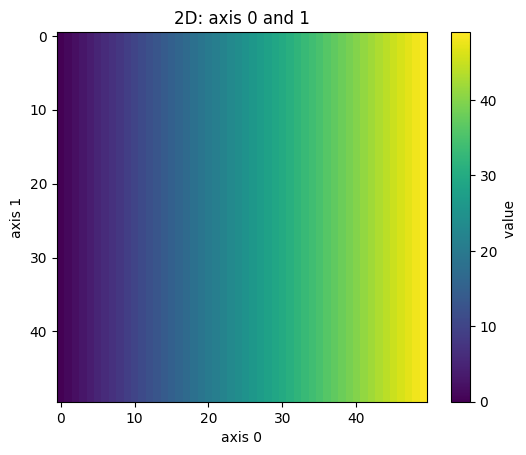

In [64]:
visualize_2d_slice(tensor_lin, axis1=0, axis2=1, fixed_indices=(10,10))

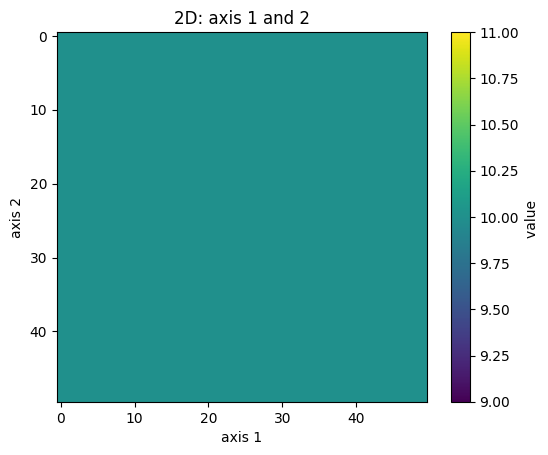

In [65]:
visualize_2d_slice(tensor_lin, axis1=1, axis2=2, fixed_indices=(10,10))

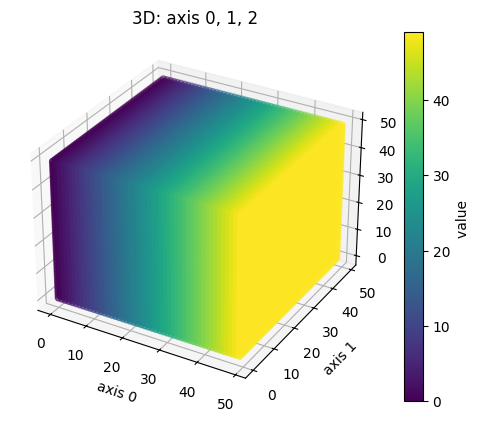

In [66]:
visualize_3d_slice(tensor_lin, axis1=0, axis2=1, axis3=2, fixed_index=10)